# Global VLBI conversion guide

In [1]:
from importlib.metadata import version
import os

try:
    import xradio

    print("XRADIO version", version("xradio"), "already installed.")
except ImportError as e:
    print(e)
    print("Installing XRADIO")

    os.system("pip install xradio")

    import xradio

    print("xradio version", version("xradio"), " installed.")

XRADIO version 1.1.12a0 already installed.


## Download dataset

global (EVN+VLBA) VLBI observation with:
- 5 scans 
- 2 fields 
- 2 spw

In [2]:
import toolviper
toolviper.utils.data.download("global_vlbi_gg084b_reduced.ms")

[2026-01-21 13:15:57,716]     INFO    viperlog:  Downloading from [cloudflare] .... 


 Download List                  
 ─────────────────────────────── 
  global_vlbi_gg084b_reduced.ms

[2026-01-21 13:15:57,719]     INFO    viperlog:  File exists: global_vlbi_gg084b_reduced.ms 


Output()

## Convert to Processing Set

In [3]:
from xradio.measurement_set import convert_msv2_to_processing_set

ms_file = "global_vlbi_gg084b_reduced.ms"

main_chunksize = {"frequency": 1, "time": 20}  # baseline, polarization
outfile = "global_vlbi_gg084b_reduced.ps.zarr"
convert_msv2_to_processing_set(
    in_file=ms_file,
    out_file=outfile,
    parallel_mode="none",
    persistence_mode='w',
    main_chunksize=main_chunksize,
)

[2026-01-21 13:15:58,771]     INFO    viperlog:  Updated partition scheme used: ['DATA_DESC_ID', 'OBSERVATION_ID'] 
[2026-01-21 13:15:58,772]     INFO    viperlog:  Number of partitions: 2 
[2026-01-21 13:15:58,773]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [None], FIELD [0, 1], SCAN [3, 319, 320, 321, 552], EPHEMERIS [None] 
[2026-01-21 13:15:59,217]  WARNING    viperlog:  Source_id is -1. No source information will be included in the field_and_source_xds. 
[2026-01-21 13:15:59,957]     INFO    viperlog:  OBSERVATION_ID [0], DDI [1], STATE [None], FIELD [0, 1], SCAN [3, 319, 320, 321, 552], EPHEMERIS [None] 
[2026-01-21 13:16:00,311]  WARNING    viperlog:  Source_id is -1. No source information will be included in the field_and_source_xds. 


## Processing Set

In [4]:
from xradio.measurement_set import open_processing_set

ps_xdt = open_processing_set(ps_store=outfile)
ps_xdt.xr_ps.summary()

,name,scan_intents,shape,execution_block_UID,polarization,scan_name,spw_name,spw_intents,field_name,source_name,line_name,field_coords,session_reference_UID,scheduling_block_UID,project_UID,start_frequency,end_frequency
0,global_vlbi_gg084b_reduced_0,[None],"(480, 57, 32, 4)",---,"[RR, RL, LR, LL]","[3, 319, 320, 321, 552]",spw_0,[UNSPECIFIED],"[EM170817_1, J1311-2329_0]",[Unknown],[],Multi-Phase-Center,---,---,GG084B,4.900500e+09,4.916000e+09
1,global_vlbi_gg084b_reduced_1,[None],"(480, 57, 32, 4)",---,"[RR, RL, LR, LL]","[3, 319, 320, 321, 552]",spw_1,[UNSPECIFIED],"[EM170817_1, J1311-2329_0]",[Unknown],[],Multi-Phase-Center,---,---,GG084B,4.916000e+09,4.931500e+09


In [5]:
ms_xdt = ps_xdt['global_vlbi_gg084b_reduced_0']
ms_xdt

<xarray.DataTree 'global_vlbi_gg084b_reduced_0'>
Group: /global_vlbi_gg084b_reduced_0
│   Dimensions:                     (time: 480, baseline_id: 57, frequency: 32,
│                                    polarization: 4, uvw_label: 3)
│   Coordinates:
│     * time                        (time) float64 4kB 1.527e+09 ... 1.527e+09
│     * baseline_id                 (baseline_id) int64 456B 0 1 2 3 ... 53 54 55 56
│     * frequency                   (frequency) float64 256B 4.9e+09 ... 4.916e+09
│     * polarization                (polarization) <U2 32B 'RR' 'RL' 'LR' 'LL'
│     * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
│       baseline_antenna1_name      (baseline_id) <U2 456B dask.array<chunksize=(57,), meta=np.ndarray>
│       baseline_antenna2_name      (baseline_id) <U2 456B dask.array<chunksize=(57,), meta=np.ndarray>
│       field_name                  (time) <U32 61kB dask.array<chunksize=(480,), meta=np.ndarray>
│       scan_name                   (time) <U21 40kB dask.array<chunksize=(480,), meta=np.ndarray>
│   Data variables:
│       EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 219kB dask.array<chunksize=(20, 57), meta=np.ndarray>
│       FLAG                        (time, baseline_id, frequency, polarization) bool 4MB dask.array<chunksize=(20, 57, 1, 4), meta=np.ndarray>
│       TIME_CENTROID               (time, baseline_id) float64 219kB dask.array<chunksize=(20, 57), meta=np.ndarray>
│       UVW                         (time, baseline_id, uvw_label) float64 657kB dask.array<chunksize=(20, 57, 3), meta=np.ndarray>
│       VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 28MB dask.array<chunksize=(20, 57, 1, 4), meta=np.ndarray>
│       WEIGHT                      (time, baseline_id, frequency, polarization) float32 14MB dask.array<chunksize=(20, 57, 1, 4), meta=np.ndarray>
│   Attributes:
│       creation_date:     2026-01-21T18:15:58.798176+00:00
│       creator:           {'software_name': 'xradio', 'version': '1.1.12a0'}
│       data_groups:       {'base': {'correlated_data': 'VISIBILITY', 'date': '20...
│       observation_info:  {'observer': ['GG084B'], 'observing_log': '[]', 'proje...
│       processor_info:    {'sub_type': '', 'type': ''}
│       schema_version:    4.0.0
│       type:              visibility
├── Group: /global_vlbi_gg084b_reduced_0/antenna_xds
│       Dimensions:                 (antenna_name: 14, cartesian_pos_label: 3,
│                                    receptor_label: 2)
│       Coordinates:
│         * antenna_name            (antenna_name) <U2 112B 'BD' 'HH' 'YS' ... 'BR' 'MK'
│         * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
│         * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
│           mount                   (antenna_name) <U16 896B dask.array<chunksize=(14,), meta=np.ndarray>
│           polarization_type       (antenna_name, receptor_label) <U1 112B dask.array<chunksize=(14, 2), meta=np.ndarray>
│           station_name            (antenna_name) <U2 112B dask.array<chunksize=(14,), meta=np.ndarray>
│           telescope_name          (antenna_name) <U3 168B dask.array<chunksize=(14,), meta=np.ndarray>
│       Data variables:
│           ANTENNA_DISH_DIAMETER   (antenna_name) float64 112B dask.array<chunksize=(14,), meta=np.ndarray>
│           ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 336B dask.array<chunksize=(14, 3), meta=np.ndarray>
│           ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 224B dask.array<chunksize=(14, 2), meta=np.ndarray>
│       Attributes:
│           overall_telescope_name:  EVN
│           relocatable_antennas:    False
│           type:                    antenna
├── Group: /global_vlbi_gg084b_reduced_0/field_and_source_base_xds
│       Dimensions:                       (field_name: 2, sky_dir_label: 2)
│       Coordinates:
│         * field_name                    (field_name) <U32 256B 'J1311

In [6]:
ant_xds = ms_xdt.antenna_xds   # or ms_xdt["antenna_xds"]
ant_xds

<xarray.DataTree 'antenna_xds'>
Group: /global_vlbi_gg084b_reduced_0/antenna_xds
    Dimensions:                 (time: 480, baseline_id: 57, frequency: 32,
                                 polarization: 4, uvw_label: 3, antenna_name: 14,
                                 cartesian_pos_label: 3, receptor_label: 2)
    Coordinates:
      * antenna_name            (antenna_name) <U2 112B 'BD' 'HH' 'YS' ... 'BR' 'MK'
      * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
      * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
        mount                   (antenna_name) <U16 896B dask.array<chunksize=(14,), meta=np.ndarray>
        polarization_type       (antenna_name, receptor_label) <U1 112B dask.array<chunksize=(14, 2), meta=np.ndarray>
        station_name            (antenna_name) <U2 112B dask.array<chunksize=(14,), meta=np.ndarray>
        telescope_name          (antenna_name) <U3 168B dask.array<chunksize=(14,), meta=np.ndarray>
    Inherited coordinates:
      * baseline_id             (baseline_id) int64 456B 0 1 2 3 4 ... 53 54 55 56
      * frequency               (frequency) float64 256B 4.9e+09 ... 4.916e+09
      * polarization            (polarization) <U2 32B 'RR' 'RL' 'LR' 'LL'
      * time                    (time) float64 4kB 1.527e+09 1.527e+09 ... 1.527e+09
      * uvw_label               (uvw_label) <U1 12B 'u' 'v' 'w'
    Data variables:
        ANTENNA_DISH_DIAMETER   (antenna_name) float64 112B dask.array<chunksize=(14,), meta=np.ndarray>
        ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 336B dask.array<chunksize=(14, 3), meta=np.ndarray>
        ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 224B dask.array<chunksize=(14, 2), meta=np.ndarray>
    Attributes:
        overall_telescope_name:  EVN
        relocatable_antennas:    False
        type:                    antenna

In [7]:
ant_xds.antenna_name.values

array(['BD', 'HH', 'YS', 'SC', 'HN', 'GB', 'NL', 'FD', 'YY', 'LA', 'PT',
       'KP', 'BR', 'MK'], dtype='<U2')

In [8]:
ms_xdt.baseline_antenna2_name.values

array(['BD', 'HH', 'HH', 'YS', 'SC', 'HN', 'GB', 'NL', 'FD', 'YS', 'SC',
       'HN', 'GB', 'NL', 'FD', 'SC', 'HN', 'GB', 'NL', 'FD', 'HN', 'GB',
       'NL', 'FD', 'GB', 'NL', 'FD', 'NL', 'FD', 'FD', 'YY', 'LA', 'PT',
       'KP', 'BR', 'MK', 'YY', 'LA', 'PT', 'KP', 'BR', 'MK', 'LA', 'PT',
       'KP', 'BR', 'MK', 'PT', 'KP', 'BR', 'MK', 'KP', 'BR', 'MK', 'BR',
       'MK', 'MK'], dtype='<U2')

In [9]:
ms_xdt.xr_ms.get_field_and_source_xds()

<xarray.DatasetView> Size: 5kB
Dimensions:                       (field_name: 2, sky_dir_label: 2,
                                   baseline_id: 57, frequency: 32,
                                   polarization: 4, time: 480, uvw_label: 3)
Coordinates:
  * field_name                    (field_name) <U32 256B 'J1311-2329_0' 'EM17...
  * sky_dir_label                 (sky_dir_label) <U3 24B 'ra' 'dec'
  * baseline_id                   (baseline_id) int64 456B 0 1 2 3 ... 54 55 56
  * frequency                     (frequency) float64 256B 4.9e+09 ... 4.916e+09
  * polarization                  (polarization) <U2 32B 'RR' 'RL' 'LR' 'LL'
  * time                          (time) float64 4kB 1.527e+09 ... 1.527e+09
  * uvw_label                     (uvw_label) <U1 12B 'u' 'v' 'w'
    source_name                   (field_name) <U7 56B dask.array<chunksize=(2,), meta=np.ndarray>
Data variables:
    FIELD_PHASE_CENTER_DIRECTION  (field_name, sky_dir_label) float64 32B dask.array<chunksize=(2, 2), meta=np.ndarray>
Attributes:
    type:     field_and_source

In [10]:
ms_xdt.gain_curve_xds

<xarray.DataTree 'gain_curve_xds'>
Group: /global_vlbi_gg084b_reduced_0/gain_curve_xds
    Dimensions:                 (time: 480, baseline_id: 57, frequency: 32,
                                 polarization: 4, uvw_label: 3, antenna_name: 14,
                                 poly_term: 3, receptor_label: 2)
    Coordinates:
      * antenna_name            (antenna_name) <U2 112B 'BD' 'HH' 'YS' ... 'BR' 'MK'
      * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
        antenna_id              (antenna_name) int32 56B dask.array<chunksize=(14,), meta=np.ndarray>
        gain_curve_type         (antenna_name) <U9 504B dask.array<chunksize=(14,), meta=np.ndarray>
        mount                   (antenna_name) <U16 896B dask.array<chunksize=(14,), meta=np.ndarray>
        polarization_type       (antenna_name, receptor_label) <U1 112B dask.array<chunksize=(14, 2), meta=np.ndarray>
        station_name            (antenna_name) <U2 112B dask.array<chunksize=(14,), meta=np.ndarray>
        telescope_name          (antenna_name) <U3 168B dask.array<chunksize=(14,), meta=np.ndarray>
    Inherited coordinates:
      * baseline_id             (baseline_id) int64 456B 0 1 2 3 4 ... 53 54 55 56
      * frequency               (frequency) float64 256B 4.9e+09 ... 4.916e+09
      * polarization            (polarization) <U2 32B 'RR' 'RL' 'LR' 'LL'
      * time                    (time) float64 4kB 1.527e+09 1.527e+09 ... 1.527e+09
      * uvw_label               (uvw_label) <U1 12B 'u' 'v' 'w'
    Dimensions without coordinates: poly_term
    Data variables:
        GAIN_CURVE              (antenna_name, poly_term, receptor_label) float64 672B dask.array<chunksize=(14, 3, 2), meta=np.ndarray>
        GAIN_CURVE_INTERVAL     (antenna_name) float64 112B dask.array<chunksize=(14,), meta=np.ndarray>
        GAIN_CURVE_SENSITIVITY  (antenna_name, receptor_label) float64 224B dask.array<chunksize=(14, 2), meta=np.ndarray>
    Attributes:
        measured_date:  2018-05-26T15:33:49.500000000
        type:           gain_curve

In [11]:
ms_xdt.system_calibration_xds   # or ms_xdt["system_calibration_xds"]

<xarray.DataTree 'system_calibration_xds'>
Group: /global_vlbi_gg084b_reduced_0/system_calibration_xds
    Dimensions:            (time: 480, baseline_id: 57, frequency: 32,
                            polarization: 4, uvw_label: 3, antenna_name: 14,
                            time_system_cal: 10357, receptor_label: 2)
    Coordinates:
      * antenna_name       (antenna_name) <U2 112B 'BD' 'HH' 'YS' ... 'KP' 'BR' 'MK'
      * time_system_cal    (time_system_cal) float64 83kB 1.527e+09 ... 1.527e+09
      * receptor_label     (receptor_label) <U5 40B 'pol_0' 'pol_1'
        antenna_id         (antenna_name) int32 56B dask.array<chunksize=(14,), meta=np.ndarray>
        mount              (antenna_name) <U16 896B dask.array<chunksize=(14,), meta=np.ndarray>
        polarization_type  (antenna_name, receptor_label) <U1 112B dask.array<chunksize=(14, 2), meta=np.ndarray>
        station_name       (antenna_name) <U2 112B dask.array<chunksize=(14,), meta=np.ndarray>
        telescope_name     (antenna_name) <U3 168B dask.array<chunksize=(14,), meta=np.ndarray>
    Inherited coordinates:
      * baseline_id        (baseline_id) int64 456B 0 1 2 3 4 5 ... 52 53 54 55 56
      * frequency          (frequency) float64 256B 4.9e+09 4.901e+09 ... 4.916e+09
      * polarization       (polarization) <U2 32B 'RR' 'RL' 'LR' 'LL'
      * time               (time) float64 4kB 1.527e+09 1.527e+09 ... 1.527e+09
      * uvw_label          (uvw_label) <U1 12B 'u' 'v' 'w'
    Data variables:
        TSYS               (antenna_name, time_system_cal, receptor_label) float64 2MB dask.array<chunksize=(7, 5179, 1), meta=np.ndarray>
    Attributes:
        type:     system_calibration

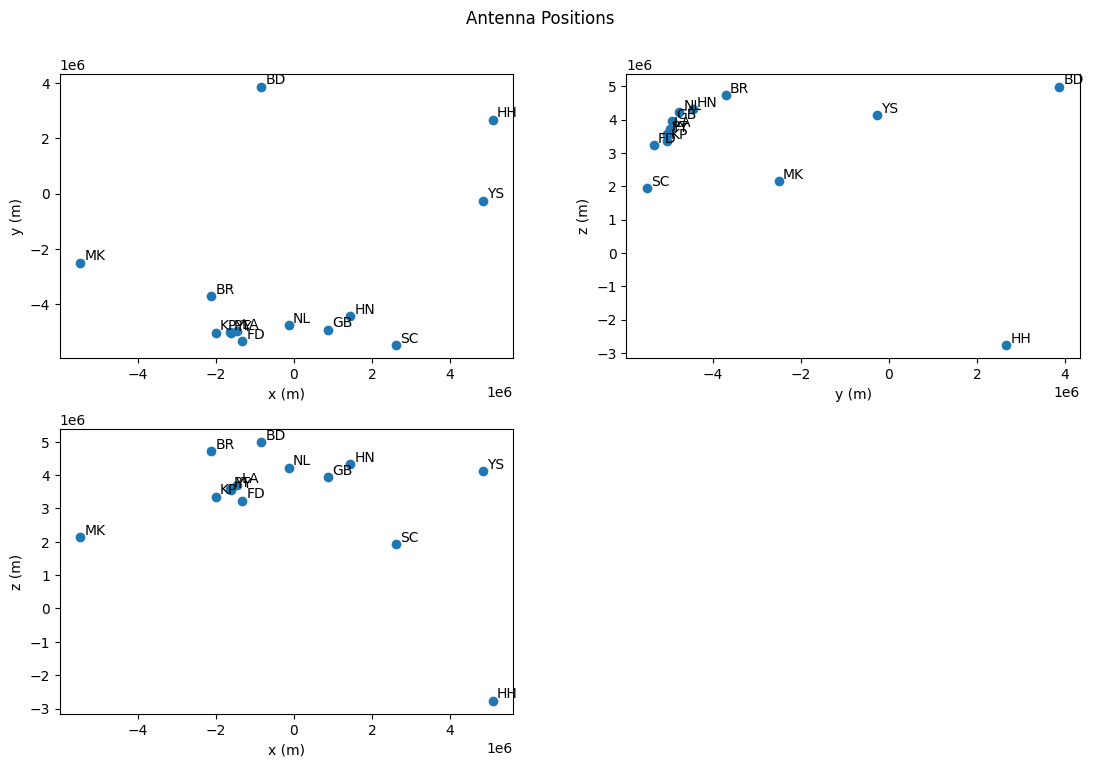

In [12]:
ps_xdt.xr_ps.plot_antenna_positions(label_all_antennas=True)

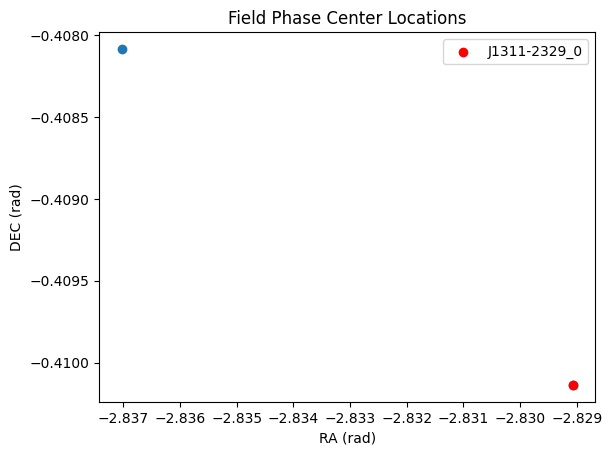

In [13]:
ps_xdt.xr_ps.plot_phase_centers()